# 1. Data Collection

Extracting mall customer zip file from API download

In [1]:
import zipfile

with zipfile.ZipFile("mall-customers.zip", "r") as zip_ref:
    zip_ref.extractall("mall_customers_data")


Loading the data into pandas

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("mall_customers_data/Mall_Customers.csv")

# Display the first few rows of the dataset
print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# 2. Data Preprocessing
Preprocess and clean data to handles missing values, nulls, ouliers and categorical variables.

In [3]:
# Check for missing values
print(data.isnull().sum())

# Select relevant features for segmentation
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Display the selected features
print(X.describe())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


# 3. Data Normalization
Next, we’ll normalize the data to ensure all features are on the same scale. This is crucial for distance-based algorithms like K-means.

In [4]:
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled features
print(X_scaled[:5])  # Show the first five rows of scaled data

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


# 4. Determine the Optimal Number of Clusters

Using the Elbow Method to find the optimal number of clusters for our K-means algorithm.

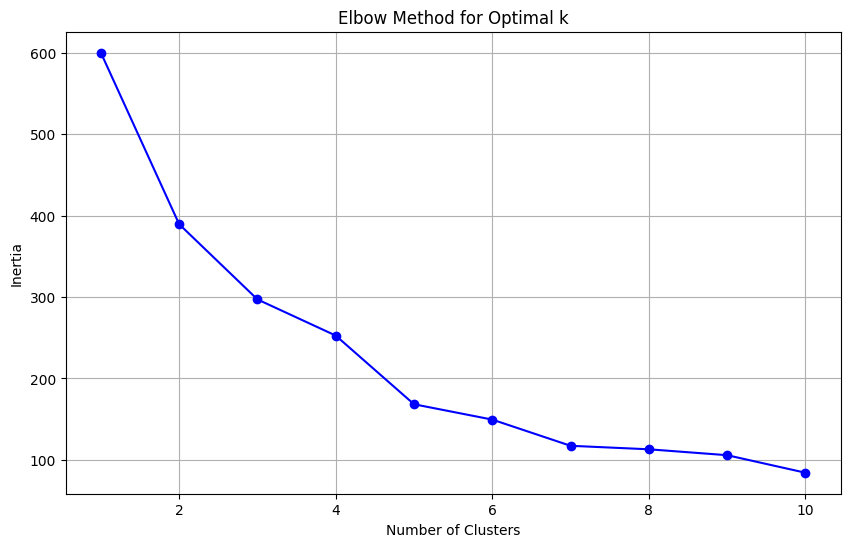

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Determine the optimal number of clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# 5. Fit K-means Model

We then fit the K-means model using the optimal number of clusters determined in the previous step.

In [6]:
from sklearn.cluster import KMeans

# Replace with the optimal k found from the elbow method (let’s assume it's 4 for this example)
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters

# Display the updated data with cluster labels
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        2  
2        3  
3        2  
4        3  


# 6. Visualization
We will now visualize the segments using plots and graphs for better understanding.

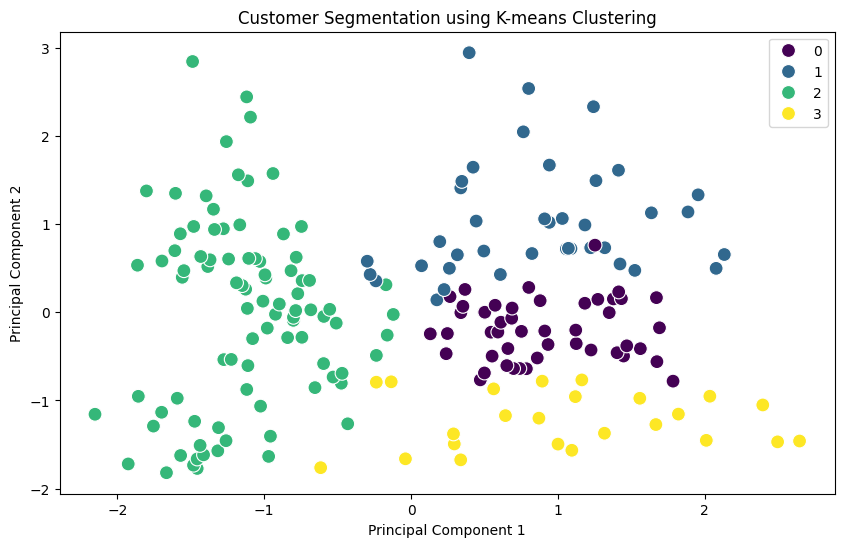

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 7. Deployment
Deploy the tool using a web framework like Flask or Django for easy access and use.

In [8]:
# Analyze Cluster Characteristics
for i in range(optimal_k):
    print(f"\nCluster {i} characteristics:")
    print(data[data['Cluster'] == i].describe())


Cluster 0 characteristics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   47.000000  47.000000           47.000000               47.000000   
mean    83.872340  55.638298           54.382979               48.851064   
std     24.425234   8.913657            8.818344                6.303825   
min     41.000000  40.000000           38.000000               35.000000   
25%     64.500000  49.000000           47.500000               44.500000   
50%     81.000000  54.000000           54.000000               48.000000   
75%    102.500000  65.000000           62.000000               54.000000   
max    161.000000  70.000000           79.000000               60.000000   

       Cluster  
count     47.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

Cluster 1 characteristics:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   39.000000  39.000000  

In [9]:
# Save the resulting data with clusters
data.to_csv('customer_segments.csv', index=False)

# Conclusion
By following the steps outlined in this project,we created a customer segmentation tool using K-means clustering in Python. The tool will help businesses better understand their customers and optimize their marketing strategies based on the segments identified. we can further explore the dataset, experiment with different clustering algorithms, or apply this approach to other datasets to enhance the analytical capabilities.

